# Laboratory 2
## Problem 1 & 4.a.

In [53]:
from datetime import date, time, datetime, timedelta
import math
import numpy
import numpy as np
import pandas as panda
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Getting the Data from the file

In [25]:
file_name = "data/employees.csv"
data = panda.read_csv(file_name)
data.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


### Number of Employees

In [26]:
def employee_number():
    return len(data)
employee_number()

1000

### Number and type of properties for each employee

Verifying if an object is of type date

In [27]:
def check_if_date(to_analyze: object):
    to_analyze = str(to_analyze)
    array = to_analyze.split('/')
    if (len(array) != 3):
        return False
    if 1 <= int(array[0]) <= 12:
        if 1 <= int(array[1]) <= 31:
            if 1800 <= int(array[2]) <= date.today().year:
                return True

Verifying if it is of type TIME

In [28]:
def check_if_time(to_analyze: object):
    hour_minute = str(to_analyze).split(':')
    if(len(hour_minute)!=2):
        return False
    if not (int(hour_minute[0]) >= 1 and int(hour_minute[0]) <= 12):
        return False
    minute = hour_minute[1].split(' ')
    if minute[1] not in ['AM', 'PM']:
        return False
    if not (int(minute[0][0]) >= 0 and int(minute[0][0]) <= 5):
        return False
    if not (int(minute[0][1]) >= 0 and int(minute[0][1]) <= 9):
        return False
    return True

For each Object/ Column we want to analize the type if they cannot be identified from the column alone

In [29]:
def analyze_type(to_analyze):
    if (check_if_date(to_analyze)):
        return "date"
    if (check_if_time(to_analyze)):
        return "time"
    else:
        return "str"
    return "object"


Getting each type of property for every column

In [30]:
def type_of_properties():
    columns = data.columns
    types: Series = data.dtypes
    for column in columns:
        if types[column] == object:
            types[column] = analyze_type(data[column][0])
    return types
type_of_properties()

First Name               str
Gender                   str
Start Date              date
Last Login Time         time
Salary                 int64
Bonus %              float64
Senior Management        str
Team                     str
dtype: object

Finding The number of Property

In [31]:
def number_of_properties():
    return len(data.columns)
number_of_properties()

8

Final Result -> type and number of properties

In [32]:
def nr_and_type_of_employee_properties():
    return number_of_properties(), type_of_properties()
nr_and_type_of_employee_properties()

(8,
 First Name               str
 Gender                   str
 Start Date              date
 Last Login Time         time
 Salary                 int64
 Bonus %              float64
 Senior Management        str
 Team                     str
 dtype: object)

### Number of employees with complete data.

In [33]:
def complete_data_nr_of_employees():
    return len(data.dropna())  #dau drop la toate randuriile care au nan values! si tehnic alea sunt toat
complete_data_nr_of_employees()

764

### Min, Max, Average values for each property

I created a class to hold the min,max,values. It is more readable when I later access those properties.

In [34]:
class Min_Max_Average:
    def __init__(self,minV,maxV,averageV,column_name):
        self.__minV=minV
        self.__maxV=maxV
        self.__averageV=averageV
        self.__column_name=column_name
    def get_minV(self):
        return self.__minV
    def get_maxV(self):
        return self.__maxV
    def get_averageV(self):
        return self.__averageV
    def get_column_name(self):
        return self.__column_name
    def __str__(self):
        return f"Min {self.__minV}, Max {self.__maxV}, Average {self.__averageV}"

In [35]:
def find_key_by_value(dictionary, target_value):
    for key, value in dictionary.items():
        if value == target_value:
            return key
    return None

In [36]:
def get_embeded_values(column):
    possible_values = data[column].dropna().unique()
    embeded_values = {}
    count = 1
    for value in possible_values:
        embeded_values[value] = count
        count += 1

In [37]:
def get_min_max_simple_string(column):
    possible_values = data[column].dropna().unique()
    embeded_values = {}
    count = 1
    for value in possible_values:
        embeded_values[value] = count
        count += 1
    frequency = {value: 0 for value in possible_values}
    for row in data[column].dropna():
        frequency[row] += 1
    min_value = min(frequency, key=frequency.get)
    max_value = max(frequency, key=frequency.get)
    sum = 0
    for type in possible_values:
        sum += embeded_values[type] * frequency[type]
    mean_value = sum / len(data[column].dropna())
    name_of_mean = find_key_by_value(embeded_values, round(mean_value))
    return Min_Max_Average(min_value, max_value, name_of_mean, column)

In [38]:
def get_min_max_time(column):
    format_string: str='%I:%M %p'
    ore:list[time]=[datetime.strptime(ora,format_string).time() for ora in data[column].dropna()]
    min_ora=min(ore)
    max_ora=max(ore)
    average_ora:int=round(sum([ora.hour for ora in ore])/len(ore))
    average_minute:int=round(sum([ora.minute for ora in ore])/len(ore))
    average=time(average_ora,average_minute)
    return Min_Max_Average(min_ora,max_ora,average,column)

In [39]:
def get_min_max_date(column):
    format='%m/%d/%Y'
    dates=[datetime.strptime(zi,format) for zi in data[column].dropna()]
    min_date = min(dates)
    max_date = max(dates)
    sum_days = sum((date - datetime.min).days for date in dates)
    average_date = datetime.min + timedelta(days=sum_days / len(dates))
    return Min_Max_Average(min_date.strftime(format),max_date.strftime(format),average_date.strftime(format),column)


In [40]:
def get_min_max_non_numerical(column):
    types=type_of_properties()
    property_column=type_of_properties()[column]
    if(property_column=="str"):
        return get_min_max_simple_string(column)
    if(property_column=="date"):
        return get_min_max_date(column)
    else:
        return get_min_max_time(column)

In [41]:
def min_max_average_values_for_each_property()-> dict[str,Min_Max_Average]:

    column_values={}
    for column in data.columns:
        if(panda.to_numeric(data[column],errors='coerce')).notnull().all():
            #fac simplu min
            min_column=min(data[column])
            max_column=max(data[column])
            average_column=numpy.mean(data[column].dropna()) #calculez average without alea nule
            column_values[column]=Min_Max_Average(min_column,max_column,average_column,column_values)
        else:
            #inseamna ca nu e numeric
            column_values[column]=get_min_max_non_numerical(column)
    return column_values
for key, value in min_max_average_values_for_each_property().items():
    print(f"\n{key}: {value}")


First Name: Min Dennis, Max Marilyn, Average William

Gender: Min Male, Max Female, Average Female

Start Date: Min 01/19/1980, Max 07/15/2016, Average 12/12/1998

Last Login Time: Min 00:00:00, Max 23:59:00, Average 11:29:00

Salary: Min 35013, Max 149908, Average 90662.181

Bonus %: Min 1.015, Max 19.944, Average 10.207555000000001

Senior Management: Min False, Max True, Average True

Team: Min Legal, Max Client Services, Average Product


In [42]:
def nr_possible_values_for_nonnumerical_properties():
    column_values={}
    for colum in data.columns:
        if data[colum].dtypes==object:
            unique=data[colum].nunique()#nuunique returneaza numarul de rows unique si e dupa coloane => deci tipuri unice
            column_values[colum]=unique
    return column_values
nr_possible_values_for_nonnumerical_properties()


{'First Name': 200,
 'Gender': 2,
 'Start Date': 972,
 'Last Login Time': 720,
 'Senior Management': 2,
 'Team': 10}

In [43]:
def resolve_non_available_properties():
    # To resolve non available properties we can either delete all of the lines
    # Or we can save instead of them a zero
    # Or we can save the mean of the rest non-null values in that column!
    # That should not change the average we think of when we think of that user!
    #la un subpunct anterior le am calculat deci putem sa le modifcam
    columns=data.columns
    averages=min_max_average_values_for_each_property()
    data_copy=data.copy()
    for column in columns:
        average=averages[column].get_averageV()
        data_copy[column].fillna(average,inplace=True)
    #Creez un nou fisier sa se vada asta si verific
    data_copy.to_csv('employee_with_noNan.csv',index=False)
    assert(len(data.notna())==len(data))
resolve_non_available_properties()

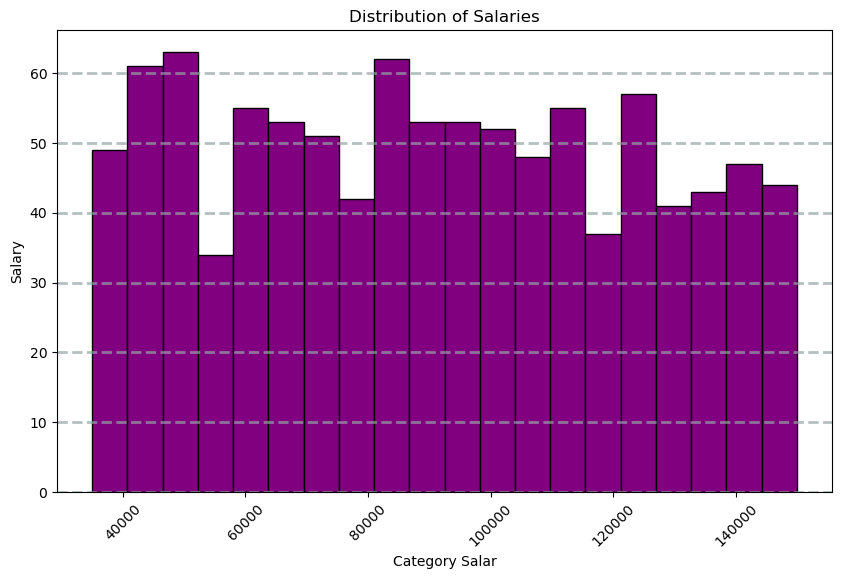

In [44]:
#1b
#distributia salariilor
salary_column=data['Salary']
plt.figure(figsize=(10,6))
plt.hist(salary_column,bins=20,edgecolor='black',color='purple')
import seaborn as sns
#adding information
plt.title('Distribution of Salaries')
plt.xlabel('Category Salar')
plt.ylabel('Salary')
plt.xticks(rotation=45)

plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


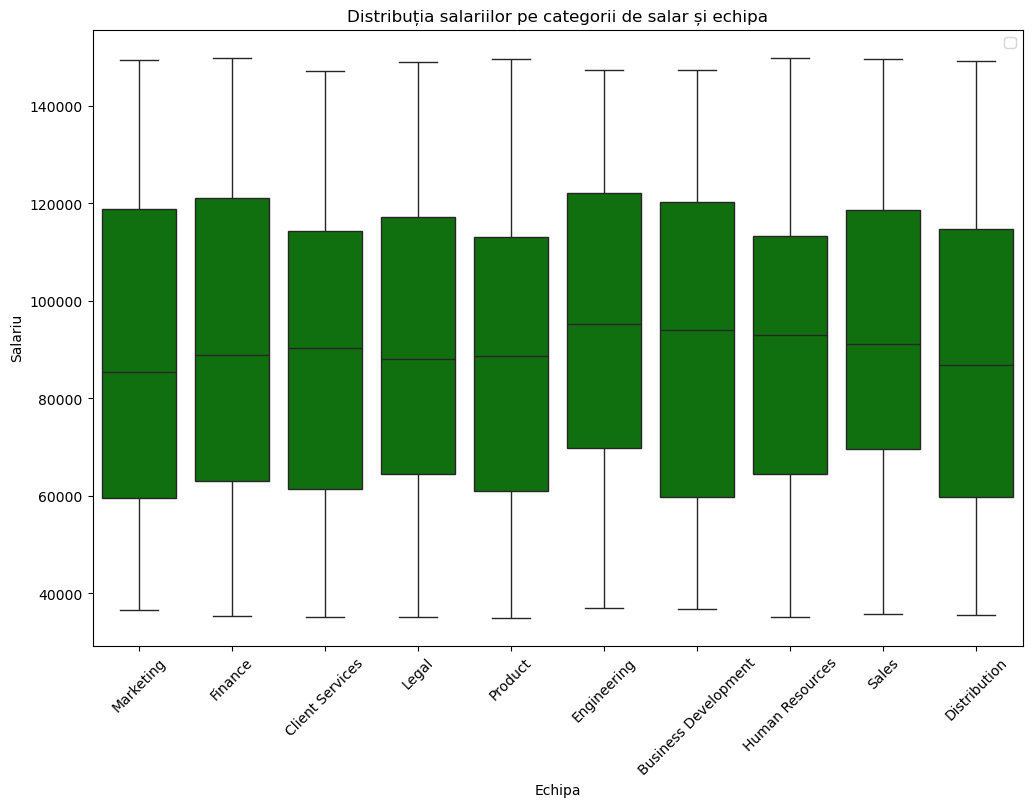

In [45]:
#Distributie pe salar si echipa
plt.figure(figsize=(12, 8))
sns.boxplot(x='Team', y='Salary',color='green', data=data)
plt.title('Distribuția salariilor pe categorii de salar și echipa')
plt.xlabel('Echipa')
plt.ylabel('Salariu')
plt.xticks(rotation=45)
plt.legend(title='Categorie de salar')
plt.legend()
plt.show()


In [46]:
#Identificare outlieri

q1=salary_column.quantile(0.25)
q3=salary_column.quantile(0.75)
iqr=q3-q1
outliers=data[(salary_column <(q1 -1.5*iqr)) |(salary_column> q3+1.5*iqr)]
outliers

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team


In [47]:
def get_min_max_avg(column):
    return min_max_average_values_for_each_property()[column]

NORMALIZARE

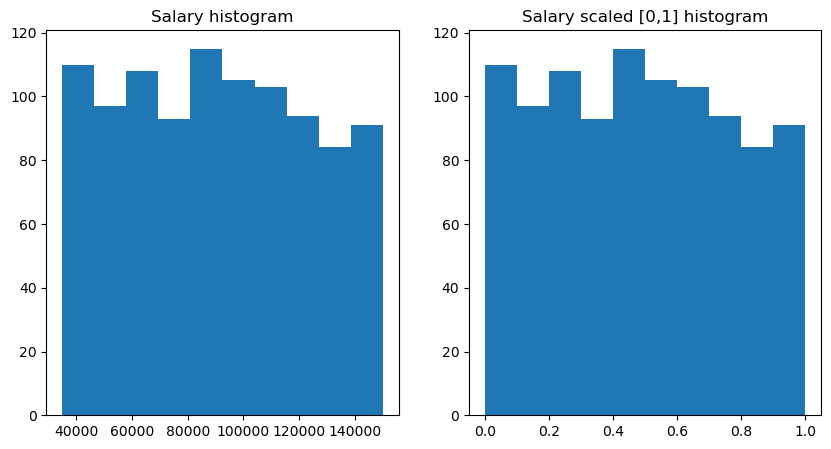

In [48]:
def normalizare_salary_min_max():
    data_temp = data.copy()
    data_temp['Salary'] = (data_temp['Salary'] - get_min_max_avg('Salary').get_minV()) / (
                get_min_max_avg('Salary').get_maxV() - get_min_max_avg('Salary').get_minV())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.hist(data['Salary'])
    ax1.set_title('Salary histogram')
    ax2.hist(data_temp['Salary'])
    ax2.set_title('Salary scaled [0,1] histogram')
    plt.show()
normalizare_salary_min_max()

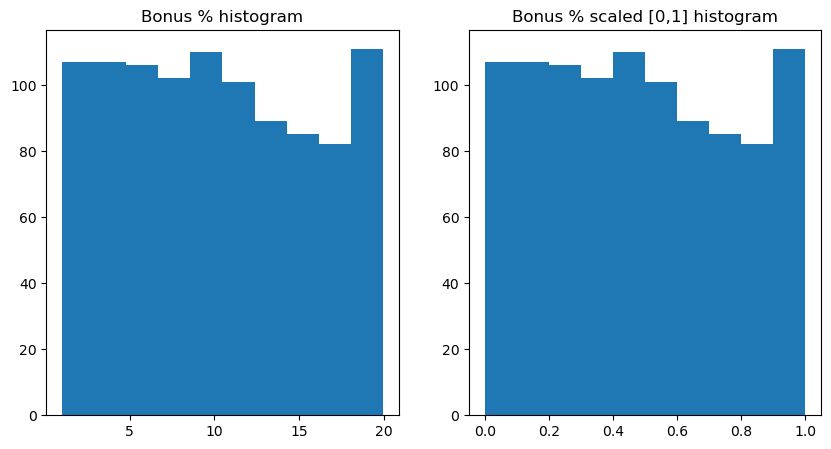

In [63]:
def normalizare_bonus_min_max():
    data_temp = data.copy()
    data_temp['Bonus %'] = (data_temp['Bonus %'] - get_min_max_avg('Bonus %').get_minV()) / (get_min_max_avg('Bonus %').get_maxV() - get_min_max_avg('Bonus %').get_minV())
    #data_temp['Bonus %']=np.log(data_temp['Bonus %'])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.hist(data['Bonus %'])
    ax1.set_title('Bonus % histogram')
    ax2.hist(data_temp['Bonus %'])
    ax2.set_title('Bonus % scaled [0,1] histogram')
    plt.show()
normalizare_bonus_min_max()

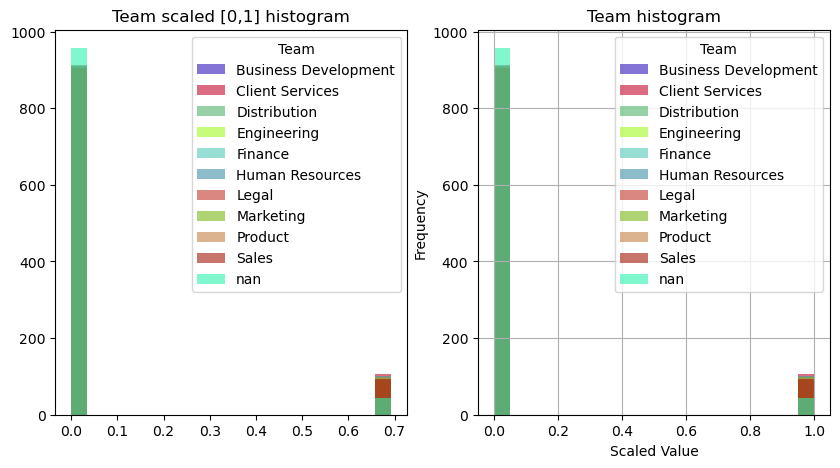

In [59]:
def normalizare_team_min_max():
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(
        transform='pandas')
    ohetransform = ohe.fit_transform(data[['Team']])
    data_temp = data.copy()
    data_temp = pd.concat([data_temp, ohetransform], axis=1).drop(columns=['Team'])

    # Apply min-max scaling manually
    data_temp_min_maxed = data_temp.copy()
    team_columns = data_temp.columns[data_temp.columns.str.startswith('Team_')]
    for column in team_columns:
        min_val = data_temp_min_maxed[column].min()
        max_val = data_temp_min_maxed[column].max()
        #data_temp_min_maxed[column] = (data_temp_min_maxed[column] - min_val) / (max_val - min_val)
        data_temp_min_maxed[column] = np.log(data_temp_min_maxed[column]+1)

    # Plot histograms with labels and colors
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))
    for team in team_columns:
        colors=color=np.random.rand(3, )
        ax1.hist(data_temp_min_maxed[team], bins=20, alpha=0.6, label=team.split('_')[1], histtype='bar',
                color=colors)
        ax2.hist(data_temp[team], bins=20, alpha=0.6, label=team.split('_')[1], histtype='bar',
                 color=colors)
    ax1.set_title('Team scaled [0,1] histogram')
    ax1.legend(title='Team')
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')
    ax2.set_title('Team histogram')
    ax2.legend(title='Team')
    plt.grid(True)
    plt.show()
normalizare_team_min_max()

Standard

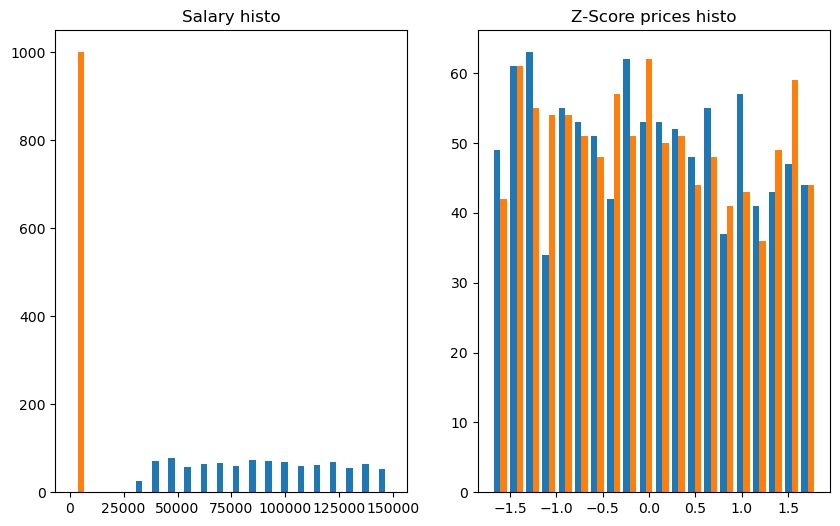

In [51]:
data_temp=data.copy()
for col in ['Salary','Bonus %']:
    data_temp[col]=((data_temp[col]-data_temp[col].mean())/data_temp[col].std())
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
ax1.hist(data[['Salary','Bonus %']],20)
ax1.set_title('Salary histo')
ax2.hist(data_temp[['Salary','Bonus %']],20)
ax2.set_title('Z-Score prices histo')
plt.show()